#  Customer Personality Analysis

Context
Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content
Attributes

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month

In [53]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import opendatasets as od

import os


import plotly.express as px

%matplotlib inline

# Target: Need to perform clustering to summarize customer segments 

## Reading Data 

In [54]:
customer=pd.read_csv('marketing_campaign.csv', delimiter='\t')
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [55]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [56]:
customer.shape

(2240, 29)

In [57]:
customer.size

64960

In [58]:
customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Preparing Data 

In [59]:
missingValues = customer.isna().sum().to_dict()
missingValues_df = pd.DataFrame(list(missingValues.items()), columns = ['Column', 'Missing_Values'])
# missingValues_df

fig = px.bar(missingValues_df,
            x = 'Column', y = 'Missing_Values',
#             template = 'plotly_red',
            title = 'Missing Values')
fig.show()

In [60]:
customer = customer.dropna()
customer.shape

(2216, 29)

In [61]:
import datetime as dt
customer['Age'] = 2015 - customer.Year_Birth
customer['Age']

0       58
1       61
2       50
3       31
4       34
        ..
2235    48
2236    69
2237    34
2238    59
2239    61
Name: Age, Length: 2216, dtype: int64

In [62]:
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
customer['Month_Customer'] = 12.0 * (2015 - customer.Dt_Customer.dt.year ) + (1 - customer.Dt_Customer.dt.month)

customer['Dt_Customer']


0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [63]:
customer['Month_Customer'] 

0       33.0
1        5.0
2       17.0
3        3.0
4       12.0
        ... 
2235    19.0
2236     3.0
2237    12.0
2238    12.0
2239    27.0
Name: Month_Customer, Length: 2216, dtype: float64

In [64]:
# MntWines: Amount spent on wine in last 2 years
# MntFruits: Amount spent on fruits in last 2 years
# MntMeatProducts: Amount spent on meat in last 2 years
# MntFishProducts: Amount spent on fish in last 2 years
# MntSweetProducts: Amount spent on sweets in last 2 years
# MntGoldProds: Amount spent on gold in last 2 years

customer['Total_Spending'] = (customer.MntWines + customer.MntFruits + 
                              customer.MntMeatProducts + customer.MntFishProducts + 
                              customer.MntSweetProducts + customer.MntGoldProds)

customer['Total_Spending'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Total_Spending, dtype: int64

In [65]:
customer['Average_Spending'] = ((customer.MntWines + customer.MntFruits + 
                              customer.MntMeatProducts + customer.MntFishProducts + 
                              customer.MntSweetProducts + customer.MntGoldProds)/6)
customer['Average_Spending'].head()

0    269.500000
1      4.500000
2    129.333333
3      8.833333
4     70.333333
Name: Average_Spending, dtype: float64

In [66]:
# customer.info()

In [67]:
customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 20) & (customer['Age']<= 39), 'AgeGroup'] = 'Adult'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer.loc[(customer['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

customer['AgeGroup'].head()

0    Middle Age Adult
1        Senior Adult
2    Middle Age Adult
3               Adult
4               Adult
Name: AgeGroup, dtype: object

In [68]:
customer['Children'] = customer['Kidhome'] + customer['Teenhome']
customer['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

In [69]:
# df['Kidhome']

In [70]:
customer.Marital_Status = customer.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})
customer['Marital_Status'].head()

0     Single
1     Single
2    Partner
3    Partner
4    Partner
Name: Marital_Status, dtype: object

Now we need to remove some OUTLIERS

Text(0.5, 1.0, 'Visualizing for Outliers in Age')

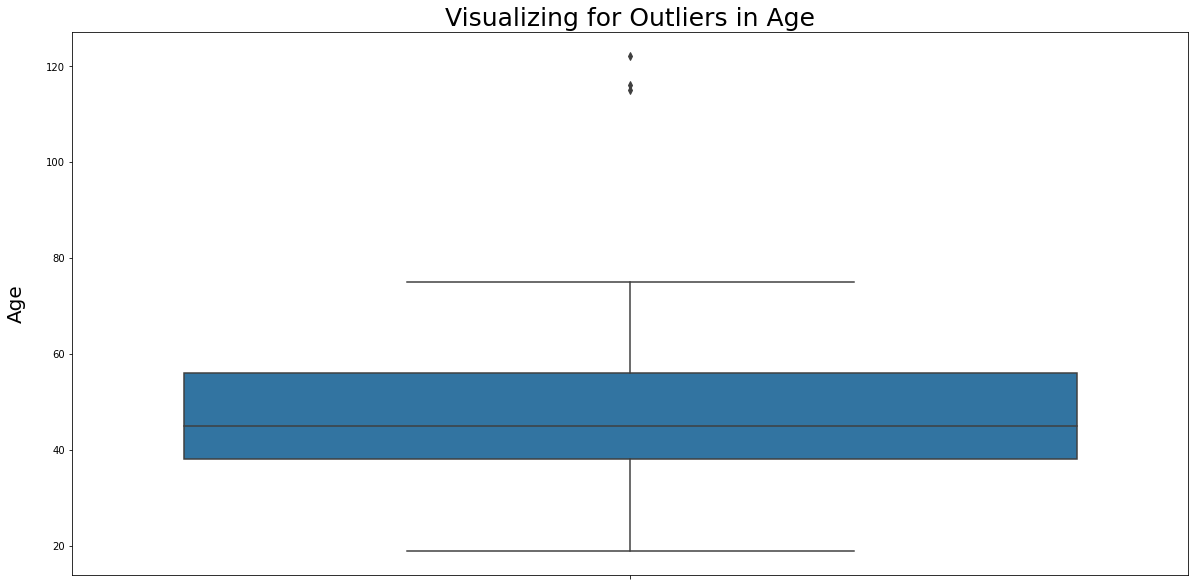

In [71]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = customer.Age)
plt.ylabel('Age', fontsize = 20, labelpad = 20)
plt.title('Visualizing for Outliers in Age', fontsize = 25)

We can clearly visualize tha ages of some of the customers is more than 100. Which is not comman and easily acceptable.
So, we can count it as outliers

Text(0.5, 1.0, 'Visualizing for Outliers in Income of the Customers')

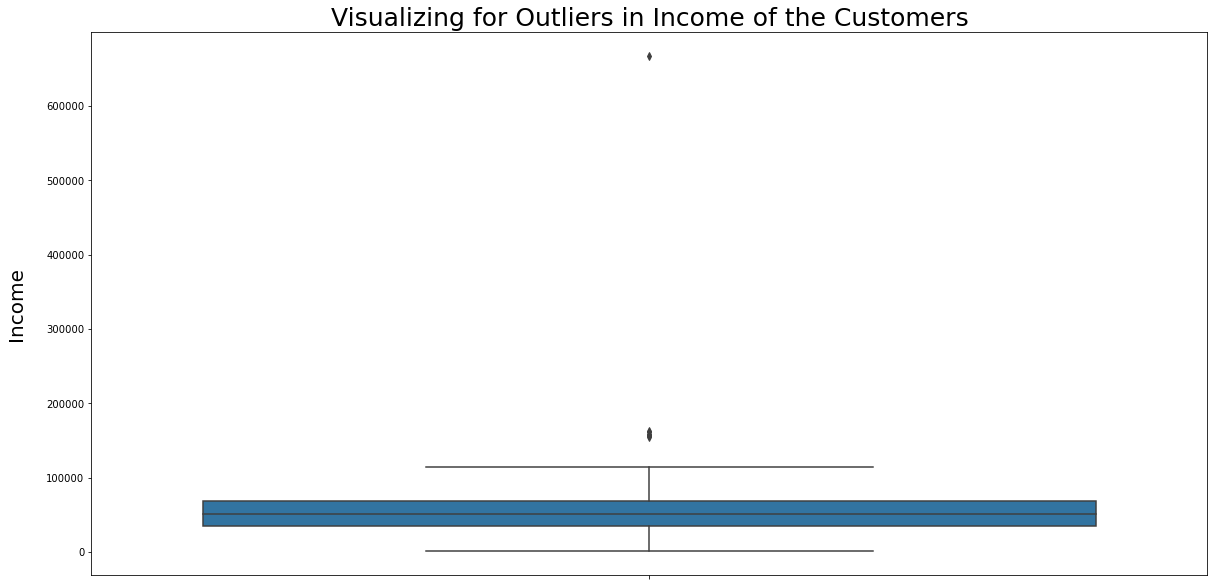

In [72]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = customer.Income)
plt.ylabel('Income', fontsize = 20, labelpad = 20)
plt.title('Visualizing for Outliers in Income of the Customers', fontsize = 25)

We can observe that some of the customers have income more than 600,000 which is not appropriate according to our data. So, it becomes an outlier for our data.

In [73]:
customer = customer[customer.Age < 100]
customer = customer[customer.Income < 120000]

## Exploratory Data Analysis

### Marital Status Analysis

In [74]:
maritalStatus = customer.Marital_Status.value_counts()
# maritalStatus

fig = px.pie(maritalStatus,
             values = maritalStatus.values,
             names = maritalStatus.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
            title = 'Marital Status')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                 marker = dict(line = dict(color = 'white', width = 3)))
fig.show()

We can observe that 2/3rd part of the customers are Married and rest are the singal customers.

### Marital Spending 

Text(0.5, 1.0, 'Relation b/w Marital Status and Average Spending')

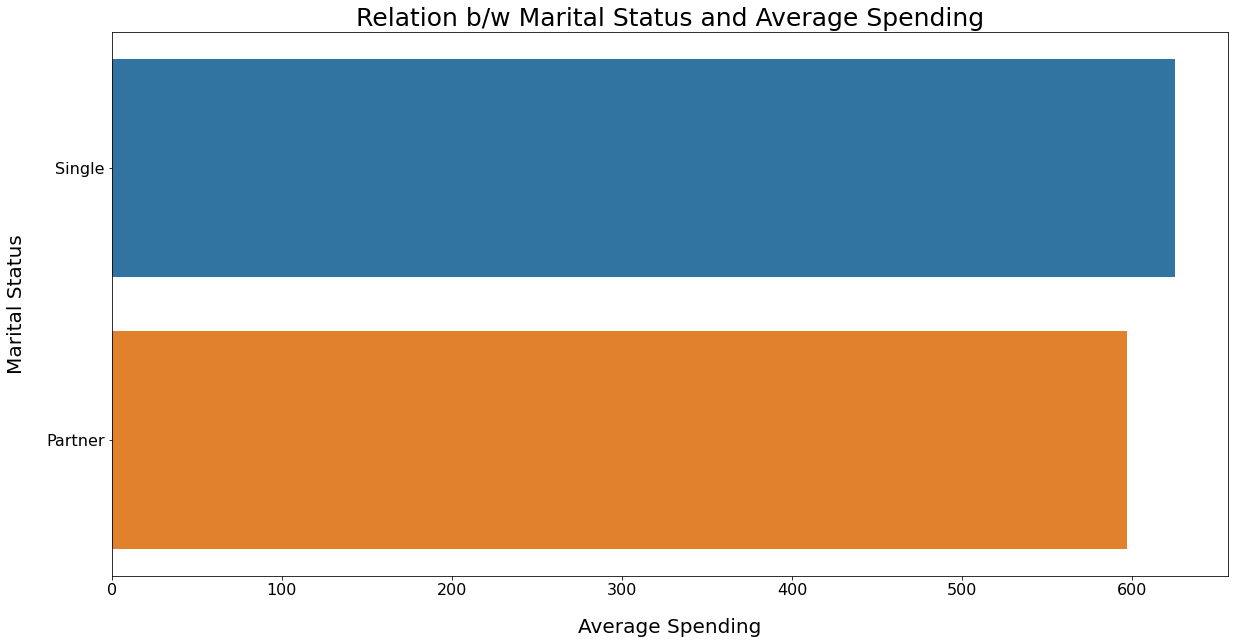

In [75]:
maritalSpending = customer.groupby('Marital_Status')['Total_Spending'].mean().sort_values(ascending = False)
maritalSpending_df = pd.DataFrame(list(maritalSpending.items()), columns = ['Marital Status', 'Average Spending'])

plt.figure(figsize = (20, 10))
sns.barplot(data = maritalSpending_df, x = 'Average Spending', y = 'Marital Status');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Average Spending', fontsize = 20, labelpad = 20)
plt.ylabel('Marital Status', fontsize = 20, labelpad = 20)
plt.title('Relation b/w Marital Status and Average Spending', fontsize = 25)

Customer who are single are very less in proportion but spending much more than the customers in relationship

### Education Level 

In [76]:
education = customer.Education.value_counts()

fig = px.pie(education,
             values = education.values,
             names = education.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
            title = 'Education Level of the Customers')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                 marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

Nearly, half of the customers comes under the Graduated Education Level.

### Children Status 

In [77]:
children = customer.Children.value_counts()

fig = px.pie(education,
             values = children.values,
             names = children.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
            title = 'Number of Children in Customers house')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                 marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

50% of the houses have only 1 child at home

### Children wise Average Spending  

Text(0.5, 1.0, 'Relation b/w Number of Children and Average Spending')

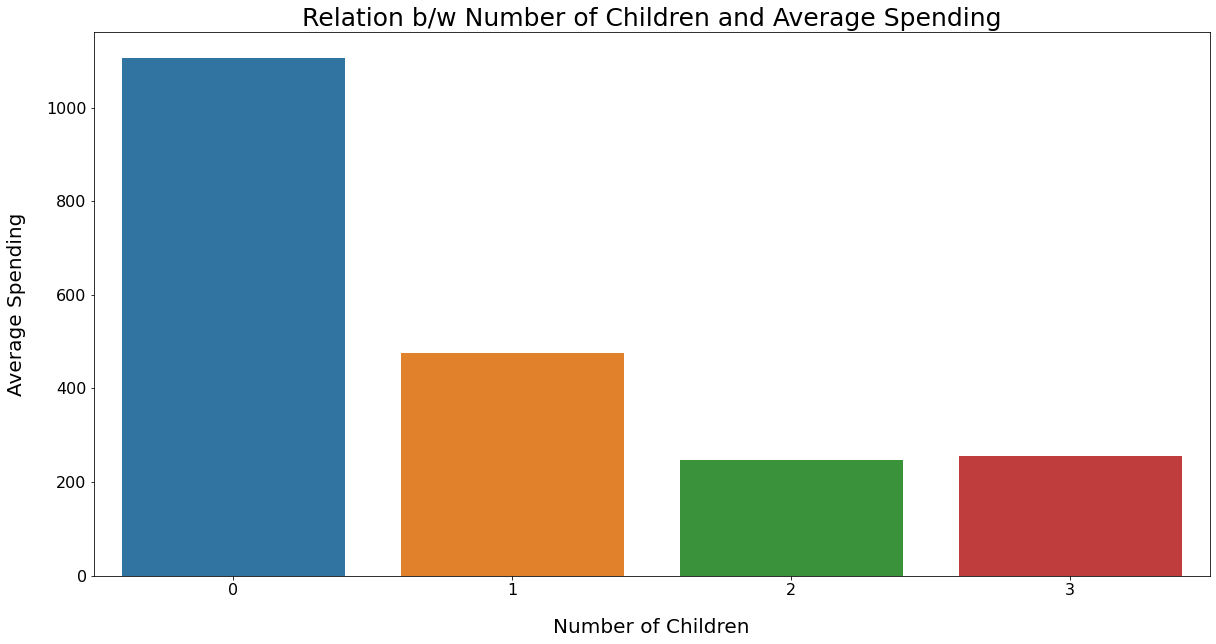

In [78]:
childrenSpending = customer.groupby('Children')['Total_Spending'].mean().sort_values(ascending = False)
childrenSpending_df = pd.DataFrame(list(childrenSpending.items()), columns = ['Children', 'AverageSpending'])

plt.figure(figsize = (20, 10))
sns.barplot(data = childrenSpending_df, x = 'Children', y = 'AverageSpending');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Number of Children', fontsize = 20, labelpad = 20)
plt.ylabel('Average Spending', fontsize = 20, labelpad = 20)
plt.title('Relation b/w Number of Children and Average Spending', fontsize = 25)

We can observe that family having no children are spending much higher than other families

### Histogram based on age of the Customers 

Text(0, 0.5, 'Count')

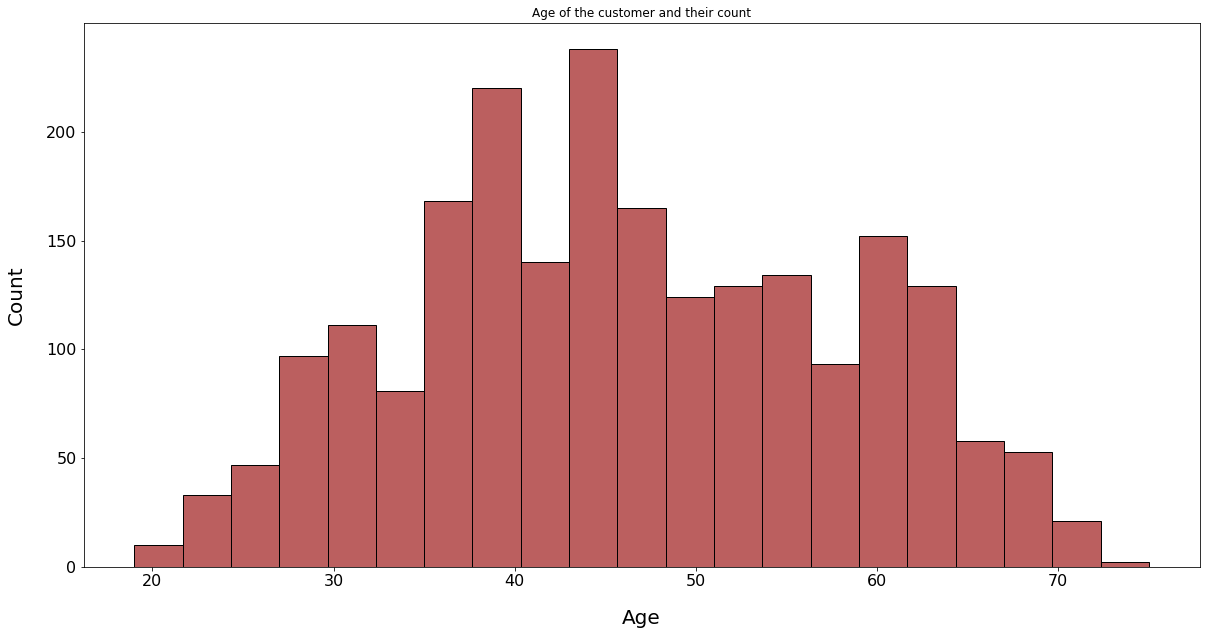

In [79]:
plt.figure(figsize = (20, 10))
ax = sns.histplot(data = customer.Age, color = 'brown');
ax.set(title = 'Age of the customer and their count')

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Age', fontsize = 20, labelpad = 20)
plt.ylabel('Count', fontsize = 20, labelpad = 20)

### Relation b/w Age and Spending 

Text(0.5, 1.0, 'Age of the Customer and their Total Spending')

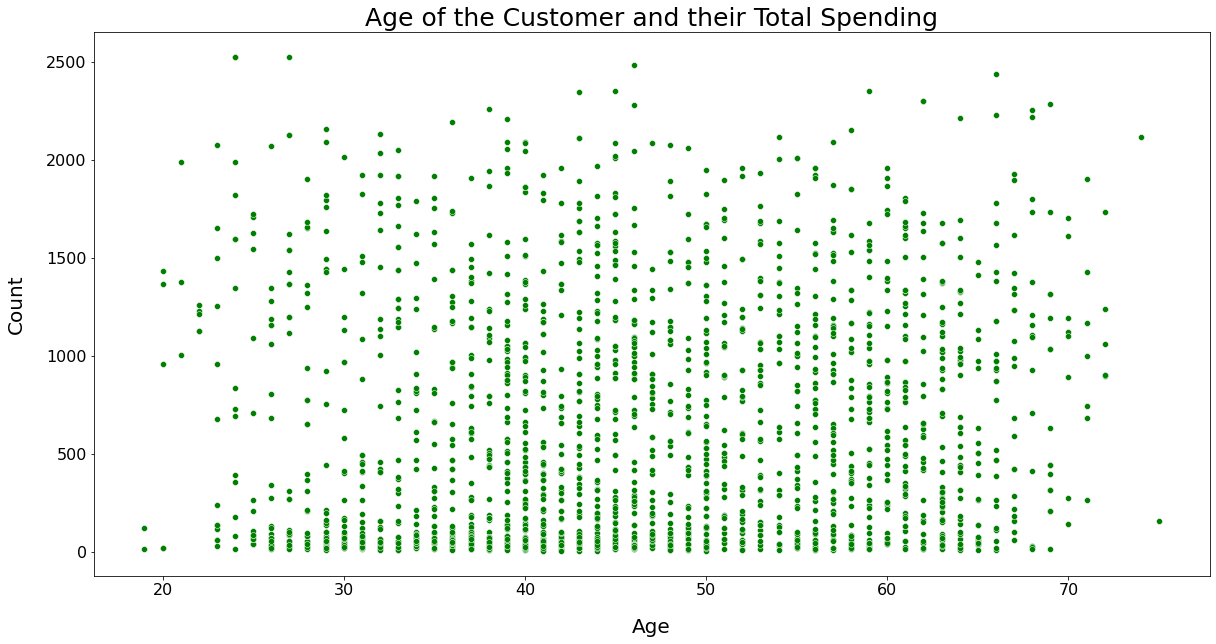

In [80]:
plt.figure(figsize = (20, 10))
ax = sns.scatterplot(x = customer.Age, y = customer.Total_Spending, color = 'green');
# ax.set(title = 'Age of the Customer and their Total Spending', fontsize = 25)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Age', fontsize = 20, labelpad = 20)
plt.ylabel('Count', fontsize = 20, labelpad = 20)
plt.title('Age of the Customer and their Total Spending', fontsize = 25)

### Customer Segmentation Age Group wise

In [81]:
agegroup = customer.AgeGroup.value_counts()

fig = px.pie(agegroup, values = agegroup.values, names = agegroup.index, width = 550,
             height = 550, title = 'Customer Segmentation Age Group wise')

fig.update_traces(textposition = 'inside',
                 textinfo = 'percent+label',
                 hole = 0.750,
                 marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'],
                              line = dict(color = 'white', width = 2)))
fig.update_layout(annotations = [dict(text = 'Age Groups', x = 0.5, y = 0.5, font_size = 36,
                                      showarrow = False, font_color = 'Black')],
                  showlegend = True)


fig.show()

More than 50% of the Middle Age group customers are present in the customer list.

### Average Spending Age Group Wise 

Text(0.5, 1.0, 'Relation b/w different Age Group and Average Spending')

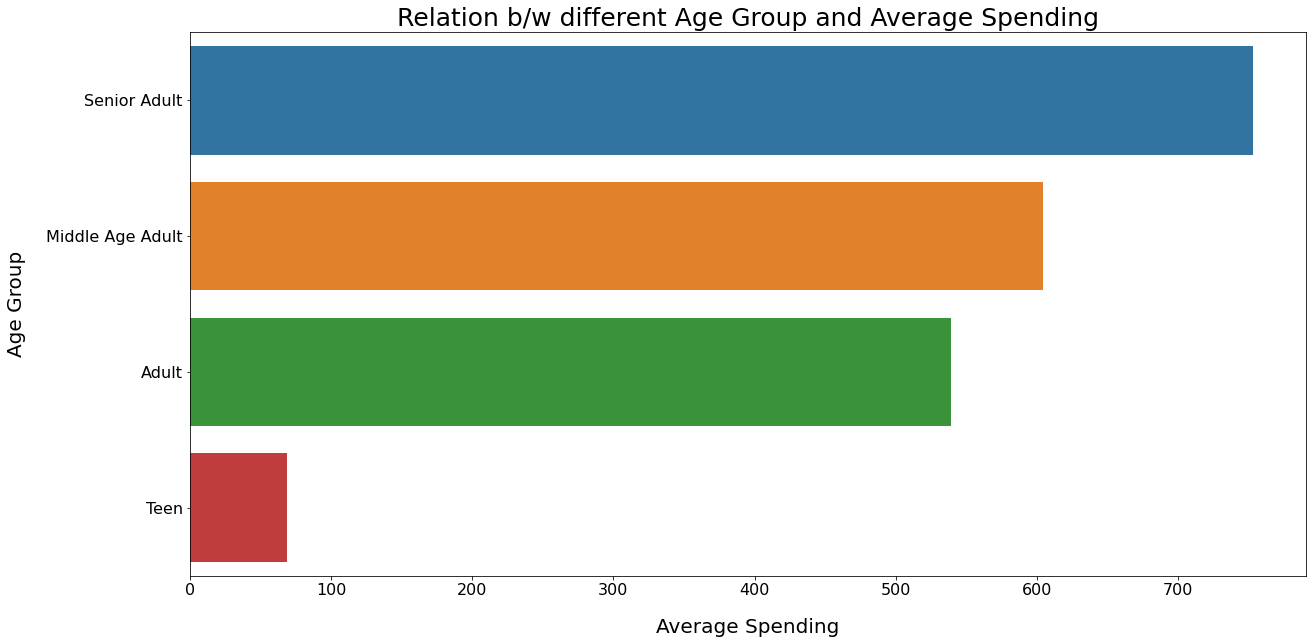

In [82]:
AgeGroupSpending = customer.groupby('AgeGroup')['Total_Spending'].mean().sort_values(ascending = False)
AgeGroupSpending_df = pd.DataFrame(list(AgeGroupSpending.items()), columns = ['AgeGroup', 'AverageSpending'])

plt.figure(figsize = (20, 10))
sns.barplot(data = AgeGroupSpending_df, x = 'AverageSpending', y = 'AgeGroup');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Average Spending', fontsize = 20, labelpad = 20)
plt.ylabel('Age Group', fontsize = 20, labelpad = 20)
plt.title('Relation b/w different Age Group and Average Spending', fontsize = 25)

We can observe that Senior Adult are the one with highest average spending

### Income Distribution of customers 

Text(0, 0.5, 'Count')

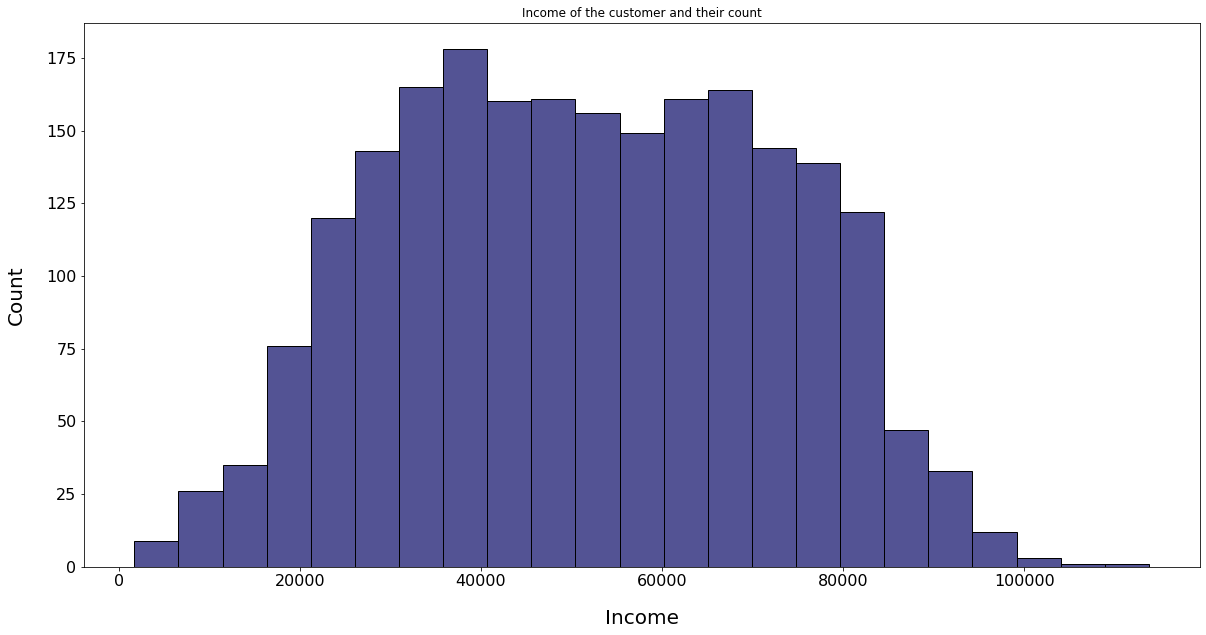

In [83]:
plt.figure(figsize = (20, 10))
ax = sns.histplot(data = customer.Income, color = 'midnightblue');
ax.set(title = 'Income of the customer and their count')

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Income', fontsize = 20, labelpad = 20)
plt.ylabel('Count', fontsize = 20, labelpad = 20)

We can observe that max number of people are having income from 30,000 to 80,000. 

### Relation between Total Spending and Income 

Text(0.5, 1.0, 'Income of the Customer and their Total Spending')

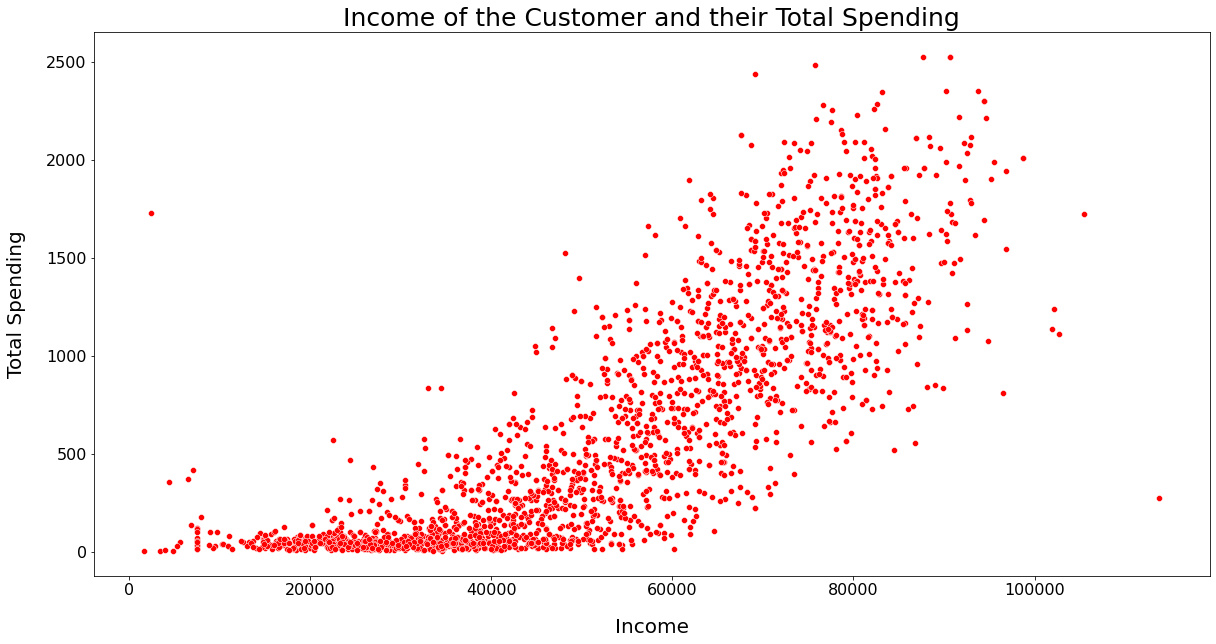

In [84]:
plt.figure(figsize = (20, 10))
ax = sns.scatterplot(x = customer.Income, y = customer.Total_Spending, color = 'Red');
# ax.set(title = 'Age of the Customer and their Total Spending', fontsize = 25)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Income', fontsize = 20, labelpad = 20)
plt.ylabel('Total Spending', fontsize = 20, labelpad = 20)
plt.title('Income of the Customer and their Total Spending', fontsize = 25)

We can clearly observe that customers with low income had spend very less compared to the customers with high Income.

### Most bought Products

Text(0.5, 1.0, 'Relation b/w Products and Average Spending')

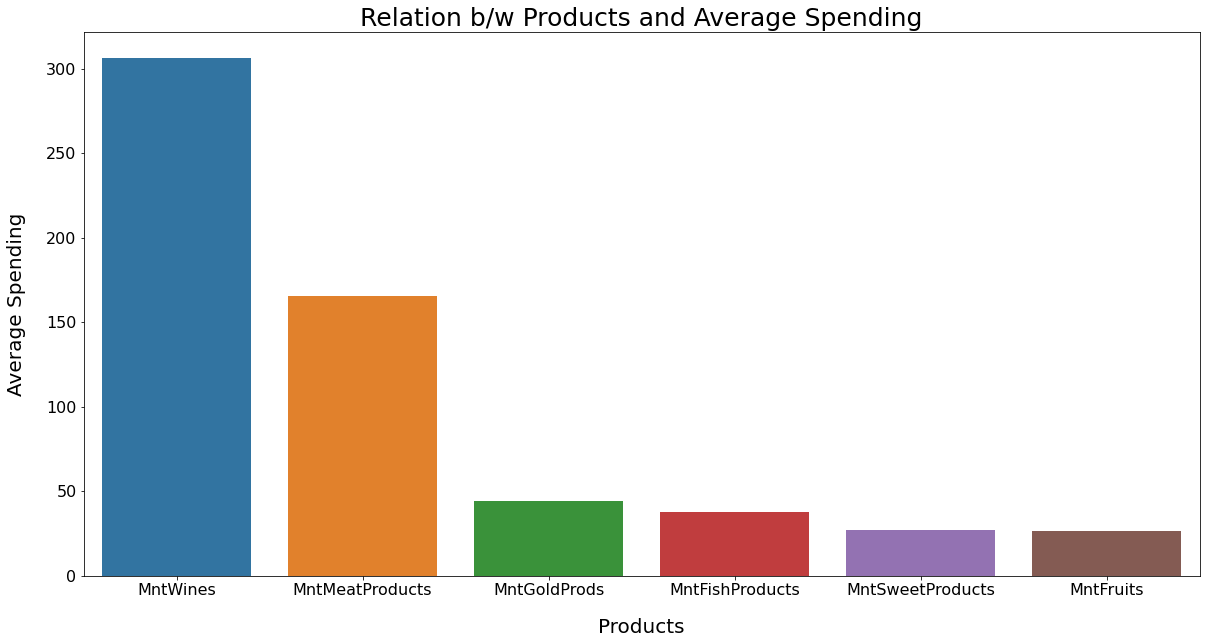

In [85]:
products = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis = 0).sort_values(ascending = False)
product_df = pd.DataFrame(list(product_means.items()), columns = ['Products', 'Average Spendings'])

plt.figure(figsize = (20, 10))
sns.barplot(data = product_df, x = 'Products', y = 'Average Spendings');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Products', fontsize = 20, labelpad = 20)
plt.ylabel('Average Spending', fontsize = 20, labelpad = 20)
plt.title('Relation b/w Products and Average Spending', fontsize = 25)

We can clearly derive that customers spend maximum on Wine and Meat.

## Cluster Modelling 

In [86]:
X = customer.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)
X.head()

,Income,Age,Month_Customer,Total_Spending,Average_Spending,Children
0,58138.0,58,33.0,1617,269.500000,0
1,46344.0,61,5.0,27,4.500000,2
2,71613.0,50,17.0,776,129.333333,0
3,26646.0,31,3.0,53,8.833333,1
4,58293.0,34,12.0,422,70.333333,1


### Chosing No. of Cluster using Elbow Method 

In [87]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Number of Clusters VS Inertia')

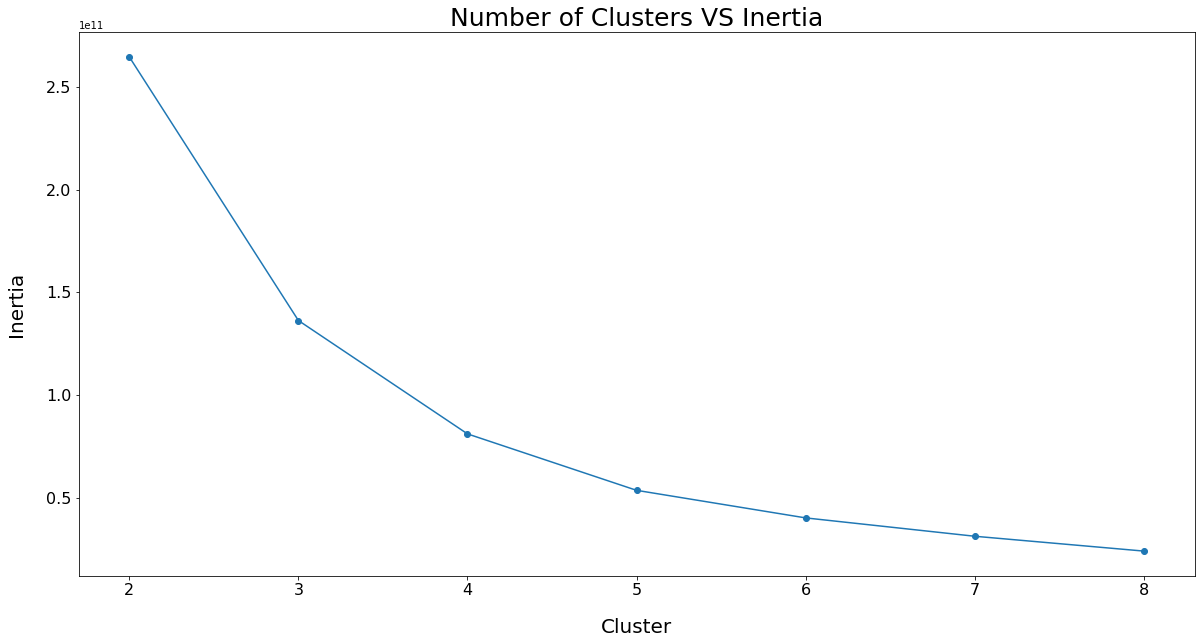

In [88]:
options = range(2, 9)
inertias = []

for n_cluster in options:
    model = KMeans(n_cluster, random_state = 42).fit(X)
    inertias.append(model.inertia_)
    
plt.figure(figsize = (20, 10))
plt.plot(options, inertias, '-o');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Inertia', fontsize = 20, labelpad = 20)
plt.title('Number of Clusters VS Inertia', fontsize = 25)

Here we can observe that their isn't much decrement in inertia after 4 clusters. Se, we can apply KMEans Algrithm for 4 clusters.

In [89]:
model = KMeans(4, init ='k-means++', random_state = 42).fit(X)

preds = model.predict(X)

customer_clusters = X.copy()
customer_clusters['Clusters'] = preds
customer_clusters.head()

,Income,Age,Month_Customer,Total_Spending,Average_Spending,Children,Clusters
0,58138.0,58,33.0,1617,269.500000,0,2
1,46344.0,61,5.0,27,4.500000,2,3
2,71613.0,50,17.0,776,129.333333,0,1
3,26646.0,31,3.0,53,8.833333,1,0
4,58293.0,34,12.0,422,70.333333,1,2


### Cluster Idenification 

Text(0.5, 1.0, 'Clusters VS Income')

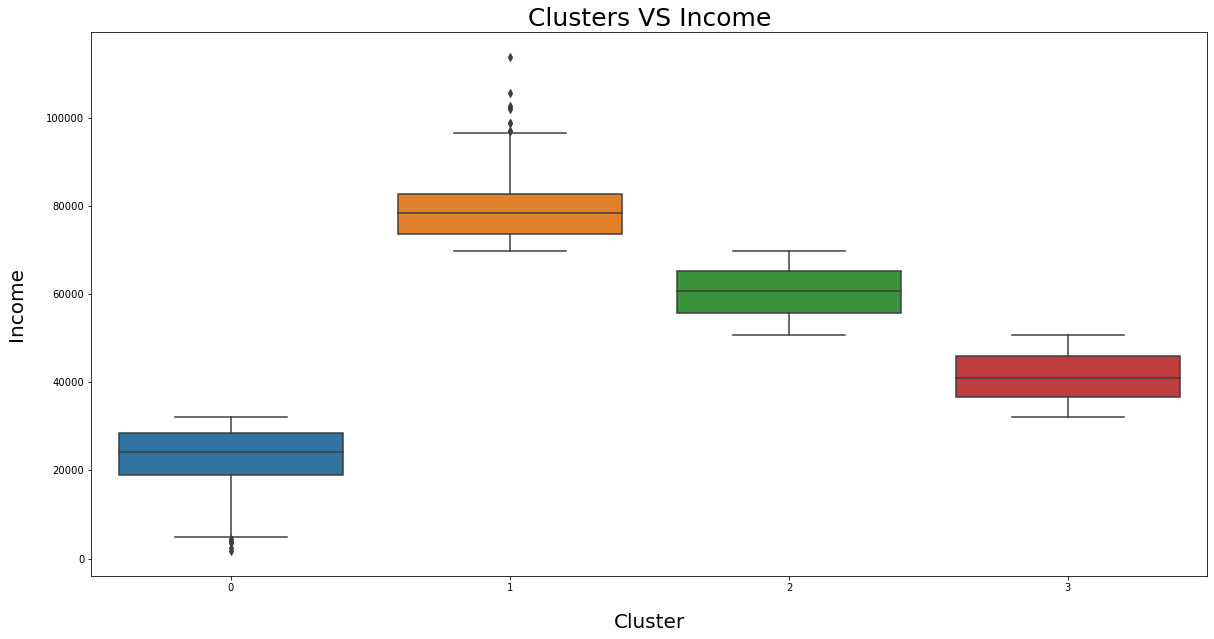

In [90]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Income')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Income', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Income', fontsize = 25)

Text(0.5, 1.0, 'Clusters VS Age')

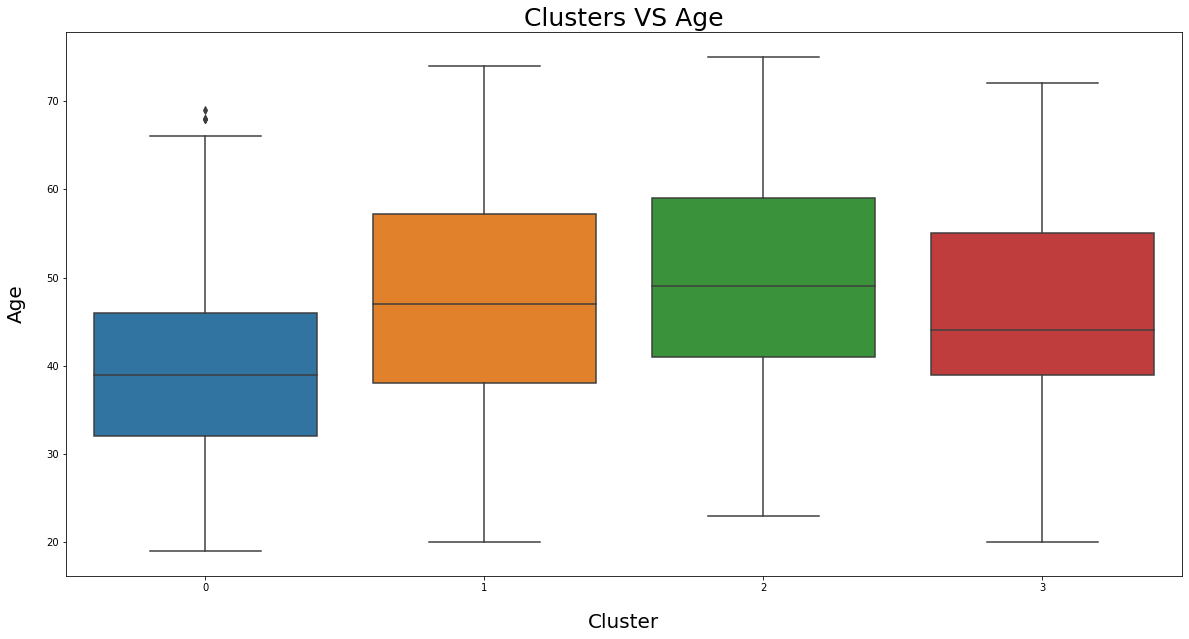

In [91]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Age')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Age', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Age', fontsize = 25)

Text(0.5, 1.0, 'Clusters VS Month_Customer')

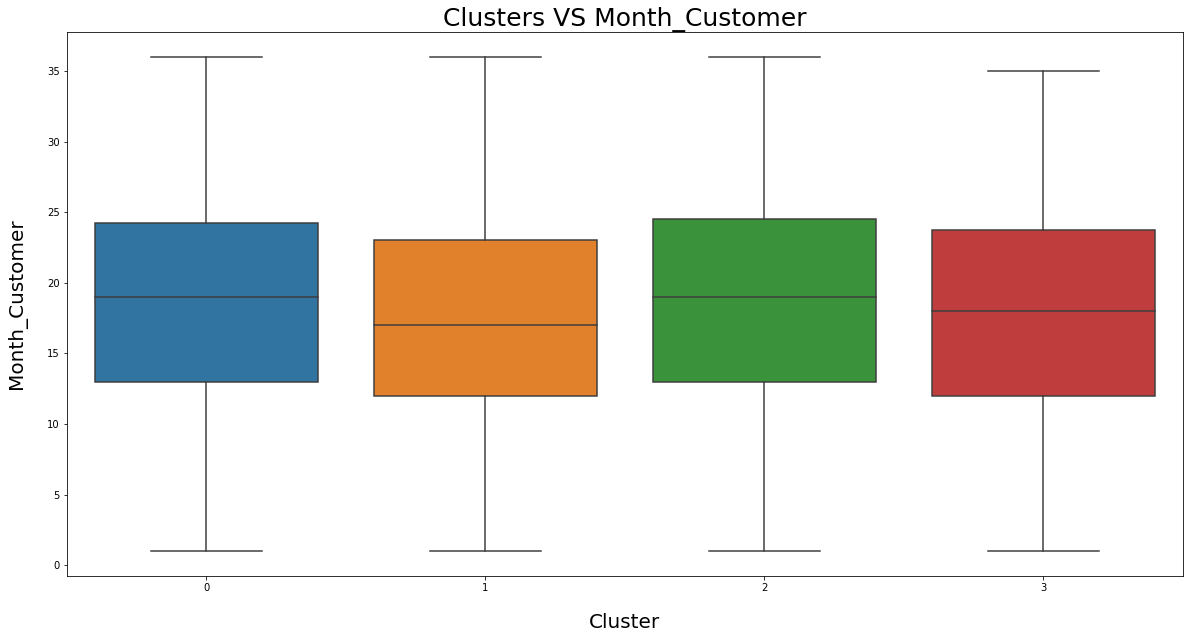

In [92]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Month_Customer')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Month_Customer', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Month_Customer', fontsize = 25)

Text(0.5, 1.0, 'Clusters VS Total_Spending')

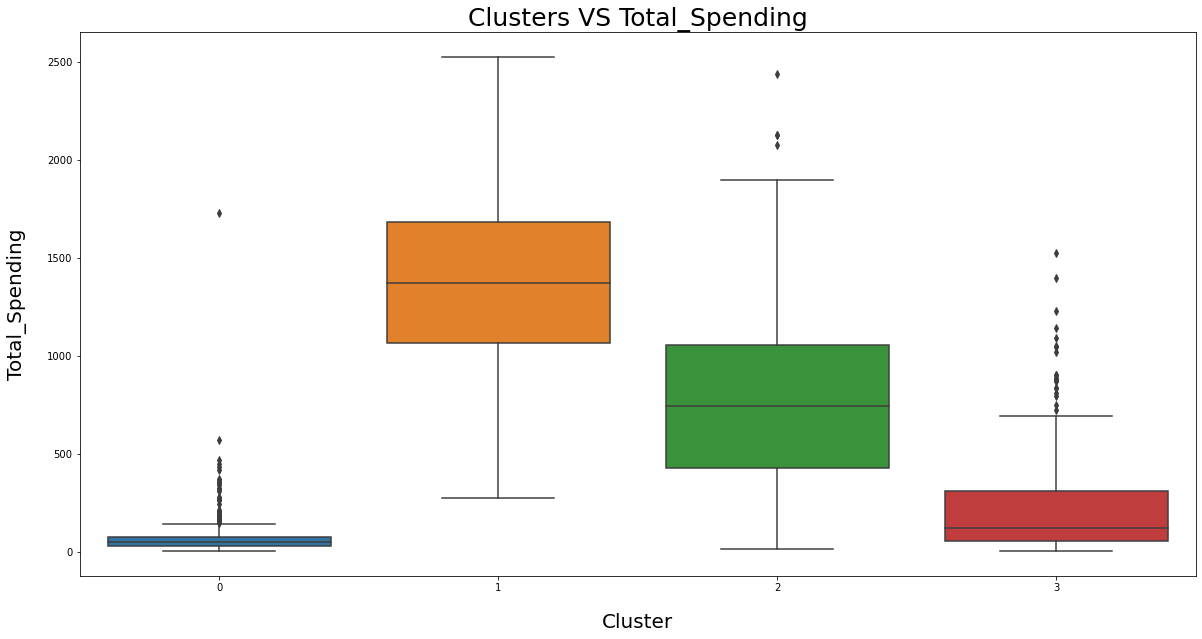

In [93]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Total_Spending')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Total_Spending', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Total_Spending', fontsize = 25)

Text(0.5, 1.0, 'Clusters VS Average_Spending')

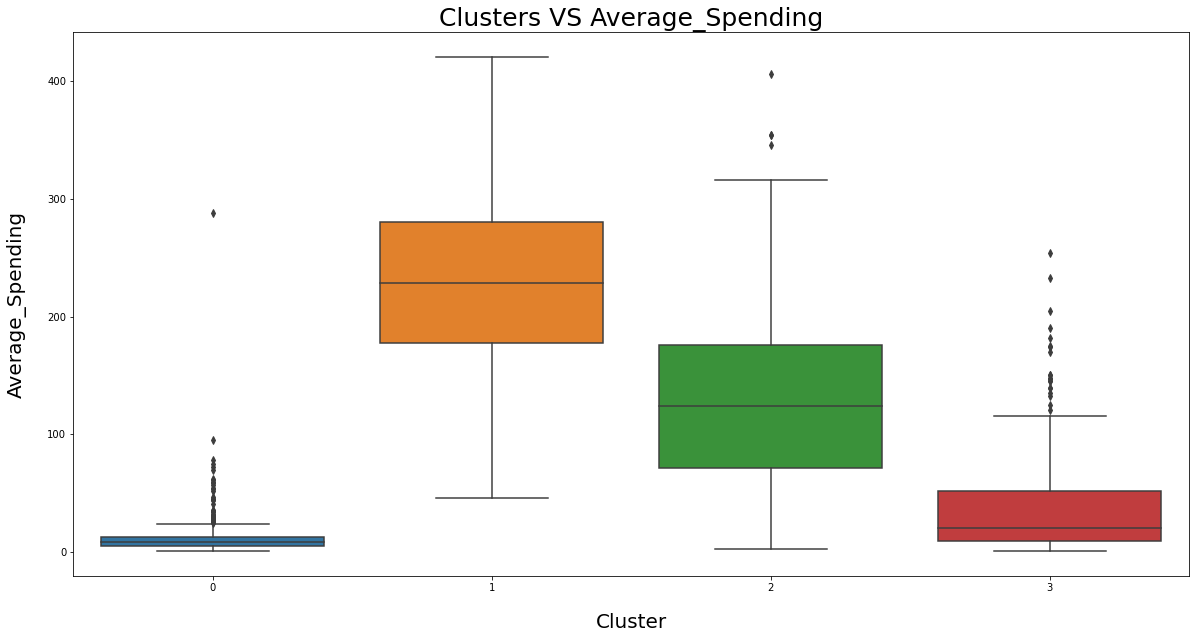

In [94]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Average_Spending')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Average_Spending', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Average_Spending', fontsize = 25)

Text(0.5, 1.0, 'Clusters VS Children')

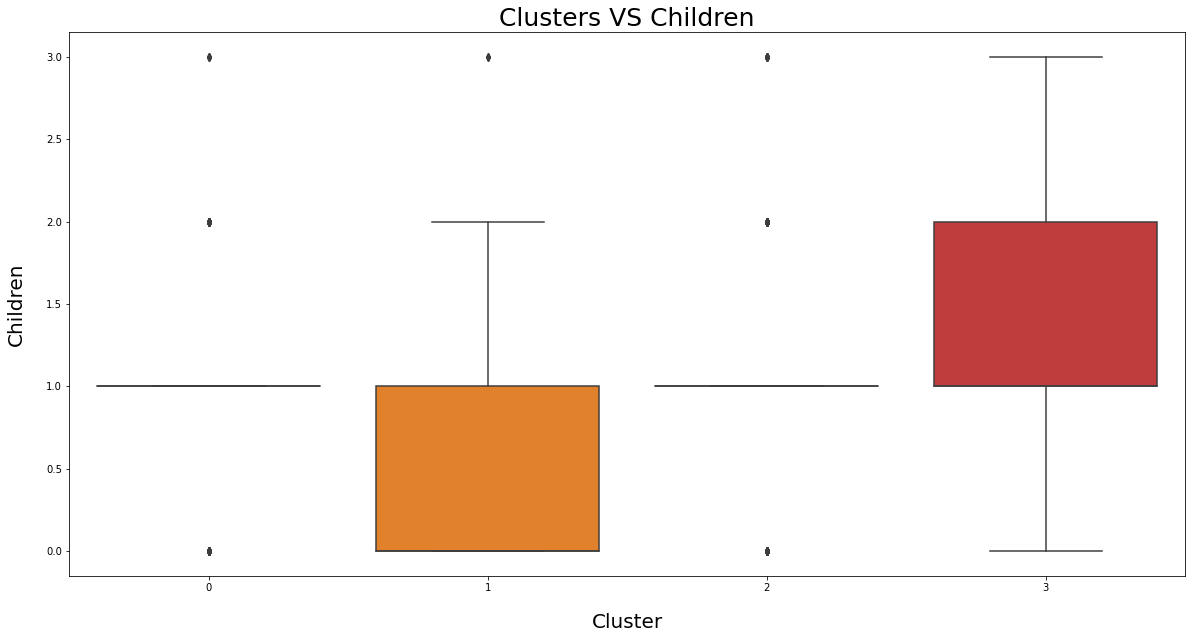

In [95]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Children')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Children', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Children', fontsize = 25)

### Cluster interpretation 

In [96]:
customer_clusters.Clusters = customer_clusters.Clusters.replace({1: 'Diamond',
                                                       2: 'Platinum',
                                                       0: 'Silver',
                                                       3: 'Gold'}) 
customer['Clusters'] = customer_clusters.Clusters
customer.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Month_Customer,Total_Spending,Average_Spending,AgeGroup,Children,Clusters
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,58,33.0,1617,269.500000,Middle Age Adult,0,Platinum
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,61,5.0,27,4.500000,Senior Adult,2,Gold
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,3,11,0,50,17.0,776,129.333333,Middle Age Adult,0,Diamond
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,...,3,11,0,31,3.0,53,8.833333,Adult,1,Silver
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,3,11,0,34,12.0,422,70.333333,Adult,1,Platinum
5,7446,1967,Master,Partner,62513.0,0,1,2013-09-09,16,520,...,3,11,0,48,16.0,716,119.333333,Middle Age Adult,1,Platinum
6,965,1971,Graduation,Single,55635.0,0,1,2012-11-13,34,235,...,3,11,0,44,26.0,590,98.333333,Middle Age Adult,1,Platinum
7,6177,1985,PhD,Partner,33454.0,1,0,2013-08-05,32,76,...,3,11,0,30,17.0,169,28.166667,Adult,1,Gold
8,4855,1974,PhD,Partner,30351.0,1,0,2013-06-06,19,14,...,3,11,1,41,19.0,46,7.666667,Middle Age Adult,1,Silver
9,5899,1950,PhD,Partner,5648.0,1,1,2014-03-13,68,28,...,3,11,0,65,10.0,49,8.166667,Senior Adult,2,Silver


### Relation of Cluster and Number of Customers  

In [97]:
clusterCounts = customer.Clusters.value_counts()

fig = px.pie(clusterCounts,
             values = clusterCounts.values,
             names = clusterCounts.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
            title = 'Number of Clusters and Customers')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                 marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

We can observe from this pie chart that most of the customers lie in the Platinum and Gold 

### Relationship between Income and Total Spending

Text(0.5, 1.0, 'Income of the Customer and their Total Spending')

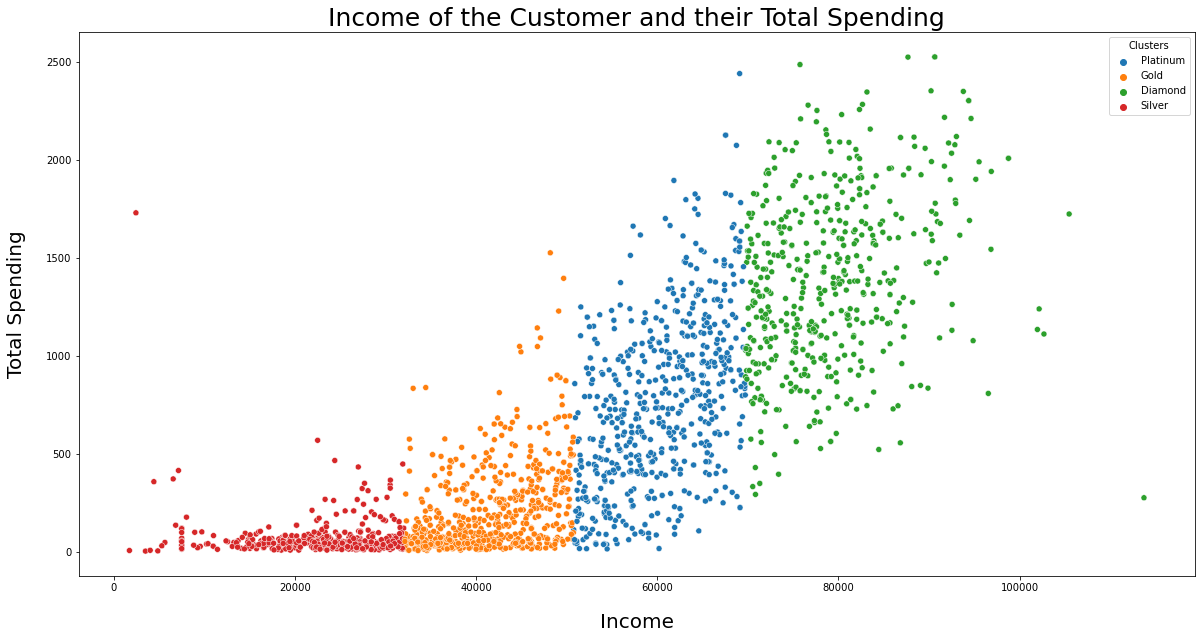

In [98]:
plt.figure(figsize = (20, 10))
ax = sns.scatterplot(data = customer, x = 'Income', y = 'Total_Spending', hue = 'Clusters');
# ax.set(title = 'Age of the Customer and their Total Spending', fontsize = 25)

# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16)
plt.xlabel('Income', fontsize = 20, labelpad = 20)
plt.ylabel('Total Spending', fontsize = 20, labelpad = 20)
plt.title('Income of the Customer and their Total Spending', fontsize = 25)

We can observe a proper clustering of the customers according to their income and total spendings

### Product wise clusters customer buying

<Figure size 3600x1800 with 0 Axes>

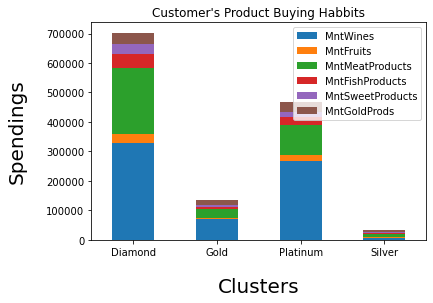

In [99]:
cluster_spendings = customer.groupby('Clusters')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
                                                  'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(50, 25))
cluster_spendings.plot(kind = 'bar', stacked = True)

plt.title('Customer\'s Product Buying Habbits')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

We can observe maximum use of Wines and Meat. So, the company needs to work on the products like fish, fruits and sweets.
We can't compare gold products as they are high in price than any other products, but it also can do good by
improving product quality.

<Figure size 2160x1080 with 0 Axes>

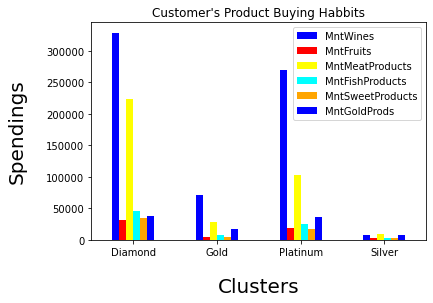

In [100]:
plt.figure(figsize=(30, 15))
cluster_spendings.plot(kind = 'bar', color = ['blue', 'red', 'yellow', 'cyan', 'orange'])

plt.title('Customer\'s Product Buying Habbits')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

### Customers purchasing platform pattern 

In [101]:
cluster_purchases = customer.groupby('Clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

<Figure size 2160x1080 with 0 Axes>

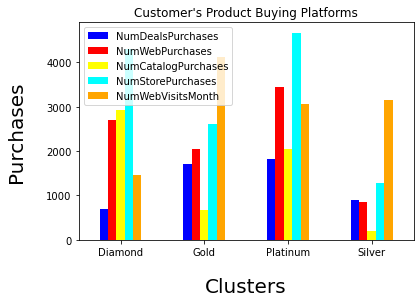

In [102]:
plt.figure(figsize=(30, 15))
cluster_purchases.plot(kind = 'bar', color = ['blue', 'red', 'yellow', 'cyan', 'orange'])

plt.title('Customer\'s Product Buying Platforms')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

Diamond and Platinum customer like to purchase from store while Gold and Silver customer likes to purchase during WebVisitMonth.

###  Promotion Acceptance by Customers

<Figure size 2160x1080 with 0 Axes>

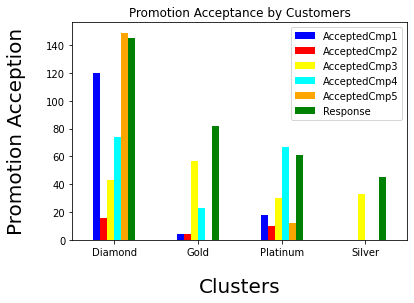

In [103]:
cluster_campaign = customer.groupby('Clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()
plt.figure(figsize=(30, 15))
cluster_campaign.plot(kind = 'bar', color = ['blue', 'red', 'yellow', 'cyan', 'orange', 'green'])

plt.title('Promotion Acceptance by Customers')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Acception', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');